In [1]:
import os
os.getcwd()
os.chdir('..')
path_to_project = os.getcwd()
print(path_to_project)

/Users/andrzej/Personal/MonkeysKaggle


In [2]:
path = os.path.join(path_to_project, "data/training/training")
path_v = os.path.join(path_to_project, "data/validation/validation")

In [53]:
import src.dataset.MonkeyDataset as md
import src.dataset.RandomImage as rI

transform = md.ImageTransform(100, 0, 1)

dataset_train = md.MonkeyDataset('data', transform=transform, phase='training', download=False) 
dataset_test = md.MonkeyDataset('data', transform=transform, phase='validation', download=False) 

y = 4-cebuella_pygmea


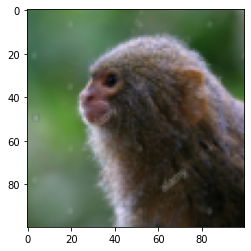

In [54]:
rI.get_random_monkey(dataset_test, random = True, cat_num = None, pic_num = None)

In [55]:
import torch.utils.data as data

BATCH_SIZE = 32

train_data_loader = data.DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=True)
test_data_loader = data.DataLoader(dataset_test, batch_size=1, shuffle=True)

# Ensemble of decision trees

In [56]:
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

In [57]:
# Training

decisionTreesForest = []

for i, (x,y) in tqdm(enumerate(train_data_loader)):
    x = x.reshape(x.shape[0], (-1))
    clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=10)
    clf.fit(x,y)
    decisionTreesForest.append(clf)

35it [00:37,  1.08s/it]


In [58]:
# Test

all_ = 0
pred_= 0
for i, (x,y) in tqdm(enumerate(test_data_loader)):
    x = x.reshape(x.shape[0], (-1))
    prediction = []
    for j in decisionTreesForest:
        prediction.append(j.predict(x)[0])
    pred = max(set(prediction), key = prediction.count) 
    
    if pred == y:
        pred_ += 1
    all_ += 1

print("Accuracy: {}".format(pred_/all_))

272it [00:08, 30.34it/s]

Accuracy: 0.3088235294117647


# RandomForest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rf_cls = RandomForestClassifier(warm_start = True, 
                                n_estimators=200, 
                                random_state=42,
                                max_depth=10)

In [121]:
BATCH_SIZE=256

train_data_loader = data.DataLoader(dataset_train, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=True)

for i, (x,y) in tqdm(enumerate(train_data_loader)):
    x = x.reshape(x.shape[0], (-1))
    rf_cls.fit(x,y)
    rf_cls.n_estimators += 200


5it [00:48,  9.63s/it]


In [122]:
# Test
test_data_loader = data.DataLoader(dataset_test, batch_size=1, shuffle=True)

all_ = 0
pred_= 0
y_true = []
y_pred = []
for i, (x,y) in tqdm(enumerate(test_data_loader)):
    x = x.reshape(x.shape[0], (-1))
    y_true.extend(y)
    y_pred.extend(rf_cls.predict(x))

272it [00:33,  8.23it/s]


In [123]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.4375

# Conclusion

Tree methods are not good to classify pictures. Papers showing some techniques how to overcome some problems:

* http://www.robots.ox.ac.uk/~vgg/publications/papers/bosch07a.pdf